# Задания

1. Разделите данные Титаника (*train.csv*) на тренировочную, валидационную и тестовую часть. С помощью валидационной части подберите гиперпараметры для моделей Random Forest, XGBoost, Logistic Regression и KNN. Получите точность этих моделей на тестовой части.
2. С помощью RandomForest выберите 2, 4, 8 самых важных признаков и проверьте точность моделей только на этих признаках.
3. Используя координаты скважин из файла *wells_info.csv* разделите их на кластера с помощью любых 4 методов и отобразите разделение. Параметры подбираются самостоятельно.
4. Приведите отобранные в 6.1 задании признаки из файла *wells_info_with_prod.csv* в двумерное пространство. Выделите цветом добычу с этой скважины.

In [126]:
# 1. Разделите данные Титаника (train.csv) на тренировочную, валидационную и тестовую часть.        
# С помощью валидационной части подберите гиперпараметры для моделей 
# Random Forest, XGBoost, Logistic Regression и KNN. 
# Получите точность этих моделей на тестовой части.

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/titanic/train.csv')

Y = df['Survived']
X = df.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train = X_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_test = X_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_val = X_val.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

X_train = prepare_num(X_train)
X_test = prepare_num(X_test)
X_val = prepare_num(X_val)

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())
X_val = X_val.fillna(X_val.median())

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() # (x - x.min()) / (x.max() - x.min())  Почему кстати он применяется, а не StandartScaler?
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
x_val = scaler.transform(X_val)

In [127]:
#    Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy') #1
model_random_forest.fit(x_train, y_train)
y_predict = model_random_forest.predict(x_val)
print("model - random_forest accuracy_valid:", accuracy_score(y_val, y_predict))

model_random_forest = RandomForestClassifier(n_estimators=20, max_depth=5, criterion='gini') #2
model_random_forest.fit(x_train, y_train)
y_predict = model_random_forest.predict(x_val)
print("model - random_forest accuracy_valid:", accuracy_score(y_val, y_predict))

model_random_forest = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='gini')# best 
model_random_forest.fit(x_train, y_train)
y_predict = model_random_forest.predict(x_val)
print("model - random_forest accuracy_valid:", accuracy_score(y_val, y_predict))

model_random_forest = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='gini') # test
model_random_forest.fit(x_train, y_train)
y_predict = model_random_forest.predict(x_test)
print("model - random_forest accuracy_test:", accuracy_score(y_test, y_predict))

model - random_forest accuracy_valid: 0.8041958041958042
model - random_forest accuracy_valid: 0.8111888111888111
model - random_forest accuracy_valid: 0.8181818181818182
model - random_forest accuracy_test: 0.776536312849162


In [128]:
#    XGBoost
from xgboost import XGBClassifier

model_XGBoost = XGBClassifier(n_estimators=20, max_depth=4, criterion='entropy') #1
model_XGBoost.fit(x_train, y_train)
y_predict = model_XGBoost.predict(x_val)
print("model - XGBoost accuracy_valid:", accuracy_score(y_val, y_predict))

model_XGBoost = XGBClassifier(n_estimators=10, max_depth=2, criterion='gini')# best 
model_XGBoost.fit(x_train, y_train)
y_predict = model_XGBoost.predict(x_val)
print("model - XGBoost accuracy_valid:", accuracy_score(y_val, y_predict))   

model_XGBoost = XGBClassifier(n_estimators=10, max_depth=2, criterion='gini') # test
model_XGBoost.fit(x_train, y_train)
y_predict = model_XGBoost.predict(x_test)
print("model - XGBoost accuracy_test:", accuracy_score(y_test, y_predict))

[22:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model - XGBoost accuracy_valid: 0.8041958041958042
[22:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

C:\Users\gnome\mambaforge\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gnome\mambaforge\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gnome\mambaforge\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

In [129]:
#    Logistic Regression
from sklearn.linear_model import LogisticRegression

model_LogisticRegression = LogisticRegression(penalty='l2',C=0.1, solver='lbfgs') #1
model_LogisticRegression.fit(x_train, y_train)
y_predict = model_LogisticRegression.predict(x_val)
print("model - LogisticRegression accuracy_valid:", accuracy_score(y_val, y_predict))

model_LogisticRegression = LogisticRegression(penalty='none',C=0.1, solver='lbfgs')# best
model_LogisticRegression.fit(x_train, y_train)
y_predict = model_LogisticRegression.predict(x_val)
print("model - LogisticRegression accuracy_valid:", accuracy_score(y_val, y_predict))

model_LogisticRegression = LogisticRegression(penalty='l2',C=1, solver='lbfgs') #3
model_LogisticRegression.fit(x_train, y_train)
y_predict = model_LogisticRegression.predict(x_val)
print("model - LogisticRegression accuracy_valid:", accuracy_score(y_val, y_predict))

model_LogisticRegression = LogisticRegression(penalty='none',C=1, solver='lbfgs') #4
model_LogisticRegression.fit(x_train, y_train)
y_predict = model_LogisticRegression.predict(x_val)
print("model - LogisticRegression accuracy_valid:", accuracy_score(y_val, y_predict))

model_LogisticRegression = LogisticRegression(penalty='none',C=1, solver='saga') #5
model_LogisticRegression.fit(x_train, y_train)
y_predict = model_LogisticRegression.predict(x_val)
print("model - LogisticRegression accuracy_valid:", accuracy_score(y_val, y_predict))

model_LogisticRegression = LogisticRegression(penalty='none',C=0.1, solver='lbfgs') # test
model_LogisticRegression.fit(x_train, y_train)
y_predict = model_LogisticRegression.predict(x_test)
print("model - LogisticRegression accuracy_test:", accuracy_score(y_test, y_predict))

model - LogisticRegression accuracy_valid: 0.7482517482517482
model - LogisticRegression accuracy_valid: 0.7902097902097902
model - LogisticRegression accuracy_valid: 0.7832167832167832
model - LogisticRegression accuracy_valid: 0.7902097902097902
model - LogisticRegression accuracy_valid: 0.7902097902097902
model - LogisticRegression accuracy_test: 0.7932960893854749


C:\Users\gnome\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\gnome\mambaforge\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gnome\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [130]:
#    KNN
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() # 1 (default n_neighbors = 5, weights='uniform')
model_KNN.fit(x_train, y_train)
y_predict = model_KNN.predict(x_val)
print("model - KNN accuracy_valid:", accuracy_score(y_val, y_predict))

model_KNN = KNeighborsClassifier(weights='distance') #2
model_KNN.fit(x_train, y_train)
y_predict = model_KNN.predict(x_val)
print("model - KNN accuracy_valid:", accuracy_score(y_val, y_predict))

model_KNN = KNeighborsClassifier(n_neighbors = 10, weights='distance')# best
model_KNN.fit(x_train, y_train)
y_predict = model_KNN.predict(x_val)
print("model - KNN accuracy_valid:", accuracy_score(y_val, y_predict))

model_KNN = KNeighborsClassifier(n_neighbors = 10, weights='uniform') #3
model_KNN.fit(x_train, y_train)
y_predict = model_KNN.predict(x_val)
print("model - KNN accuracy_valid:", accuracy_score(y_val, y_predict))

model_KNN = KNeighborsClassifier(n_neighbors = 10, weights='distance') # test
model_KNN.fit(x_train, y_train)
y_predict = model_KNN.predict(x_test)
print("model - KNN accuracy_test:", accuracy_score(y_test, y_predict))

model - KNN accuracy_valid: 0.8041958041958042
model - KNN accuracy_valid: 0.7972027972027972
model - KNN accuracy_valid: 0.8111888111888111
model - KNN accuracy_valid: 0.8111888111888111
model - KNN accuracy_test: 0.770949720670391


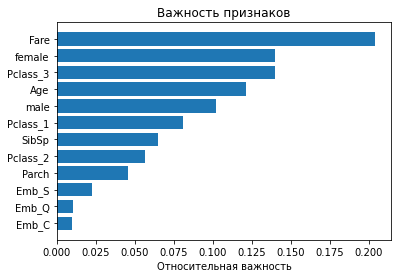

In [131]:
# 2. С помощью RandomForest выберите 2, 4, 8 самых важных признаков и проверьте точность моделей только на этих признаках.  

#    Random Forest
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

model_random_forest = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy')
model_random_forest.fit(x_val, y_val)
y_predict = model_random_forest.predict(x_test)

importances = model_random_forest.feature_importances_ # (Gini impurity) Чем меньше загрязнение, тем важнее признак?
features = X_train.columns
# Добавление сортировки по важности
indices = np.argsort(importances) 

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [132]:
# 2 самых важных признака

two_if = features[indices][-2:]
X_train_two_if = X_train[two_if]
X_test_two_if = X_test[two_if]
X_val_two_if = X_val[two_if]

scaler = MinMaxScaler() # (x - x.min()) / (x.max() - x.min())
X_train_two_if = scaler.fit_transform(X_train_two_if)
X_test_two_if = scaler.transform(X_test_two_if)
X_val_two_if = scaler.transform(X_val_two_if)

In [133]:
#    Random Forest

model_random_forest = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='gini') # test
model_random_forest.fit(X_train_two_if, y_train)
y_predict = model_random_forest.predict(X_test_two_if)
print("model - random_forest accuracy_test:", accuracy_score(y_test, y_predict))

model - random_forest accuracy_test: 0.7932960893854749


In [134]:
#    XGBoost
model_XGBoost = XGBClassifier(n_estimators=10, max_depth=2, criterion='gini') # test
model_XGBoost.fit(X_train_two_if, y_train)
y_predict = model_XGBoost.predict(X_test_two_if)
print("model - XGBoost accuracy_test:", accuracy_score(y_test, y_predict))

[22:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model - XGBoost accuracy_test: 0.776536312849162


C:\Users\gnome\mambaforge\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [135]:
#    Logistic Regression
model_LogisticRegression = LogisticRegression(penalty='none',C=0.1, solver='lbfgs') # test
model_LogisticRegression.fit(X_train_two_if, y_train)
y_predict = model_LogisticRegression.predict(X_test_two_if)
print("model - LogisticRegression accuracy_test:", accuracy_score(y_test, y_predict))

model - LogisticRegression accuracy_test: 0.7821229050279329


C:\Users\gnome\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [136]:
#    KNN
model_KNN = KNeighborsClassifier(n_neighbors = 10, weights='distance') # test
model_KNN.fit(X_train_two_if, y_train)
y_predict = model_KNN.predict(X_test_two_if)
print("model - KNN accuracy_test:", accuracy_score(y_test, y_predict))

model - KNN accuracy_test: 0.8435754189944135


In [137]:
# 4 самых важных признака
four_if = features[indices][-4:]
X_train_four_if = X_train[four_if]
X_test_four_if = X_test[four_if]
X_val_four_if = X_val[four_if]

scaler = MinMaxScaler() # (x - x.min()) / (x.max() - x.min())
X_train_four_if = scaler.fit_transform(X_train_four_if)
X_test_four_if = scaler.transform(X_test_four_if)
X_val_four_if = scaler.transform(X_val_four_if)

In [138]:
#    Random Forest

model_random_forest = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='gini') # test
model_random_forest.fit(X_train_four_if, y_train)
y_predict = model_random_forest.predict(X_test_four_if)
print("model - random_forest accuracy_test:", accuracy_score(y_test, y_predict))

model - random_forest accuracy_test: 0.8100558659217877


In [139]:
#    XGBoost
model_XGBoost = XGBClassifier(n_estimators=10, max_depth=2, criterion='gini') # test
model_XGBoost.fit(X_train_four_if, y_train)
y_predict = model_XGBoost.predict(X_test_four_if)
print("model - XGBoost accuracy_test:", accuracy_score(y_test, y_predict))

[22:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model - XGBoost accuracy_test: 0.7932960893854749


C:\Users\gnome\mambaforge\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [140]:
#    Logistic Regression
model_LogisticRegression = LogisticRegression(penalty='none',C=0.1, solver='lbfgs') # test
model_LogisticRegression.fit(X_train_four_if, y_train)
y_predict = model_LogisticRegression.predict(X_test_four_if)
print("model - LogisticRegression accuracy_test:", accuracy_score(y_test, y_predict))

model - LogisticRegression accuracy_test: 0.7821229050279329


C:\Users\gnome\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [141]:
#    KNN
model_KNN = KNeighborsClassifier(n_neighbors = 10, weights='distance') # test
model_KNN.fit(X_train_four_if, y_train)
y_predict = model_KNN.predict(X_test_four_if)
print("model - KNN accuracy_test:", accuracy_score(y_test, y_predict))

model - KNN accuracy_test: 0.7821229050279329


In [142]:
# 8 самых важных признаков
eight_if = features[indices][-4:]
X_train_eight_if = X_train[eight_if]
X_test_eight_if = X_test[eight_if]
X_val_eight_if = X_val[eight_if]

scaler = MinMaxScaler() # (x - x.min()) / (x.max() - x.min())
X_train_eight_if = scaler.fit_transform(X_train_eight_if)
X_test_eight_if = scaler.transform(X_test_eight_if)
X_val_eight_if = scaler.transform(X_val_eight_if)

In [143]:
#    Random Forest

model_random_forest = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='gini') # test
model_random_forest.fit(X_train_eight_if, y_train)
y_predict = model_random_forest.predict(X_test_eight_if)
print("model - random_forest accuracy_test:", accuracy_score(y_test, y_predict))

model - random_forest accuracy_test: 0.8100558659217877


In [144]:
#    XGBoost
model_XGBoost = XGBClassifier(n_estimators=10, max_depth=2, criterion='gini') # test
model_XGBoost.fit(X_train_eight_if, y_train)
y_predict = model_XGBoost.predict(X_test_eight_if)
print("model - XGBoost accuracy_test:", accuracy_score(y_test, y_predict))

[22:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model - XGBoost accuracy_test: 0.7932960893854749


C:\Users\gnome\mambaforge\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [145]:
#    Logistic Regression
model_LogisticRegression = LogisticRegression(penalty='none',C=0.1, solver='lbfgs') # test
model_LogisticRegression.fit(X_train_eight_if, y_train)
y_predict = model_LogisticRegression.predict(X_test_eight_if)
print("model - LogisticRegression accuracy_test:", accuracy_score(y_test, y_predict))

model - LogisticRegression accuracy_test: 0.7821229050279329


C:\Users\gnome\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [146]:
#    KNN
model_KNN = KNeighborsClassifier(n_neighbors = 10, weights='distance') # test
model_KNN.fit(X_train_eight_if, y_train)
y_predict = model_KNN.predict(X_test_eight_if)
print("model - KNN accuracy_test:", accuracy_score(y_test, y_predict))

model - KNN accuracy_test: 0.7821229050279329


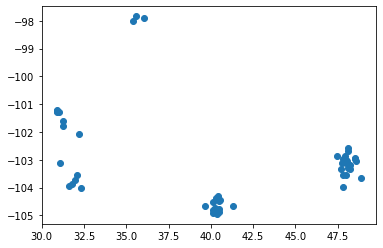

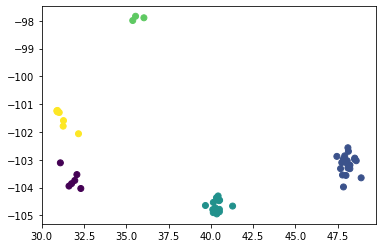

In [8]:
# 3. Используя координаты скважин из файла wells_info.csv  (LatWGS84 - Широта на поверхности; LonWGS84 - Долгота на поверхности)
# разделите их на кластера с помощью любых 4 методов и отобразите разделение. 
# Параметры подбираются самостоятельно.
import matplotlib.pyplot as plt
import pandas as pd
wells_info_df = pd.read_csv('data/wells_info.csv')
data = wells_info_df[['LatWGS84','LonWGS84']]

plt.scatter(data['LatWGS84'], data['LonWGS84']) # 4 or 5 clusters
plt.show()

# k-means                                                     
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
clusters = model.fit_predict(data)
plt.scatter(data['LatWGS84'], data['LonWGS84'], c=clusters)
plt.show()

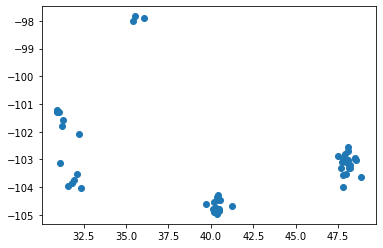

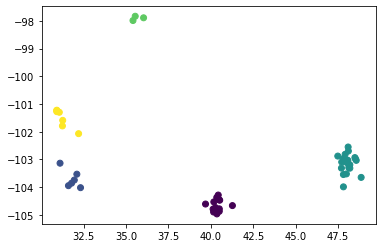

In [15]:
# DBSCAN (density ...)                                                  
plt.scatter(data['LatWGS84'], data['LonWGS84']) # 4 or 5 clusters
plt.show()

from sklearn.cluster import DBSCAN

model = DBSCAN(eps=1, min_samples=1)
clusters = model.fit_predict(data)

plt.scatter(data['LatWGS84'], data['LonWGS84'], c=clusters)
plt.show()

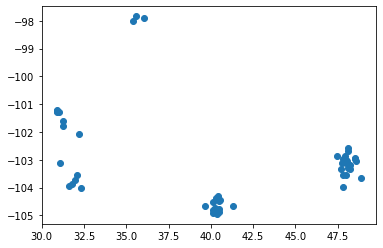

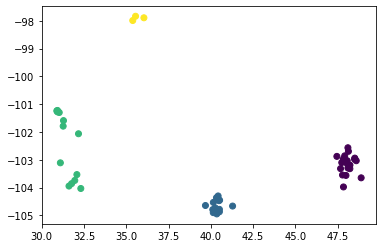

In [19]:
from sklearn.cluster import MeanShift                                 # Как я поняла, он похож на метод k-means, только тут нам не надо знать заранее
plt.scatter(data['LatWGS84'], data['LonWGS84']) # 4 or 5 clusters     сколько кластеров есть, он сам их ищет.            
plt.show()
model = MeanShift()
clusters = model.fit_predict(data)
plt.scatter(data['LatWGS84'],data['LonWGS84'], c=clusters)

C:\Users\gnome\mambaforge\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\gnome\mambaforge\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
0,39.68445,-104.60557,9005.0,994.6866,591.8004
1,40.49692,-104.77859,4195.0,991.5857,628.6321
2,40.34780,-104.36863,4273.0,1000.2760,564.4841
3,40.17445,-104.52932,7078.0,973.4437,824.0020
4,40.49558,-104.86757,3211.0,783.5919,603.1414


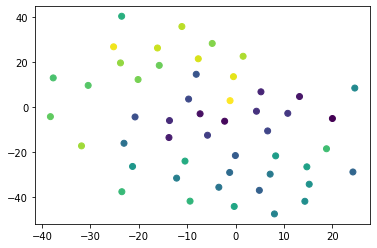

In [11]:
# 4. Приведите отобранные в 6.1 задании признаки из файла              
# wells_info_with_prod.csv в двумерное пространство. 
# Выделите цветом добычу с этой скважины.


# from 6 lesson
import pandas as pd

wells_info_with_prod_df = pd.read_csv('data\wells_info_with_prod.csv')
x = wells_info_with_prod_df.drop(['API','Prod1Year', 'ProdAll','PermitDate', 'SpudDate',
       'FirstProductionDate', 'operatorNameIHS', 'BasinName',
       'StateName', 'CountyName', 'LatWGS84', 'LonWGS84', 'CompletionDate', 'formation'], axis=1)

# formation = pd.get_dummies(x['formation'])
# x = x.drop(columns = 'formation')
# x = x.join(formation)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x = x._get_numeric_data()
scaled_x = scaler.fit_transform(x)


# t-SNE
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

model = TSNE(n_components=2)
squeezed = model.fit_transform(scaled_x)
plt.scatter(squeezed[:,0], squeezed[:,1], c=np.linspace(0, 1, num=squeezed.shape[0]))
x.head()